In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
%run -i 'functions.py'


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
ERROR:root:File `'functions.py'` not found.


In [2]:
pd.set_option('display.max_columns', None)
wine= pd.read_csv('winequalityN.csv')

In [3]:
wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
wine['type_group'] = wine.quality.apply(lambda q: 'low' if q <= 5 else 'medium' if q <= 7 else 'high')

In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
 13  type_group            6497 non-null   object 
dtypes: float64(11), int64(1), object(2)
memory usage: 710.7+ KB


In [6]:
wine.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
type_group               0
dtype: int64

After some research of each variable, I can to a conclusion it is best to drop the rows with null values because if I relplace with 0,it will affect the meaning.

In [7]:
wine.dropna(inplace=True)

In [8]:
wine.shape

(6463, 14)

In [ ]:
clean.to_csv('clean_wine.csv', index=False)

In [9]:
wine.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type_group              0
dtype: int64

I am seperating the big dataframe into the two diferent type of wines mainly for EDA

In [10]:
red = wine[wine['type'] == 'red']
white = wine[wine['type'] == 'white']

In [11]:
red.shape, white.shape

((1593, 14), (4870, 14))

There is about a third of white wines compared to the red ones. 

### Correlation Matrix of both white and red wines

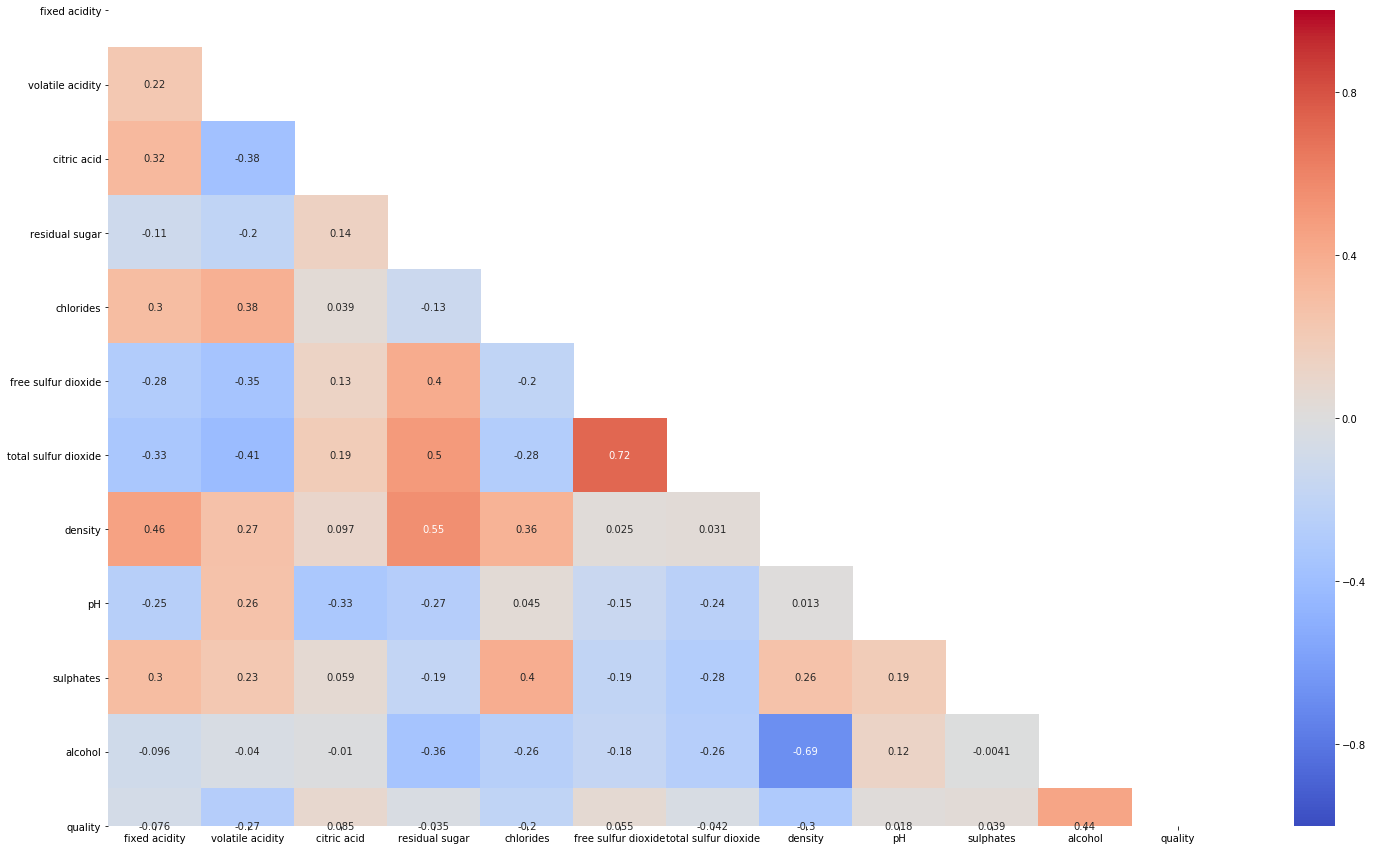

In [12]:
f, ax = plt.subplots(figsize=(25, 15))
matrix = np.triu(wine.corr())
sns.heatmap(wine.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', mask = matrix)

## EDA

### Red Wine Pairplot 

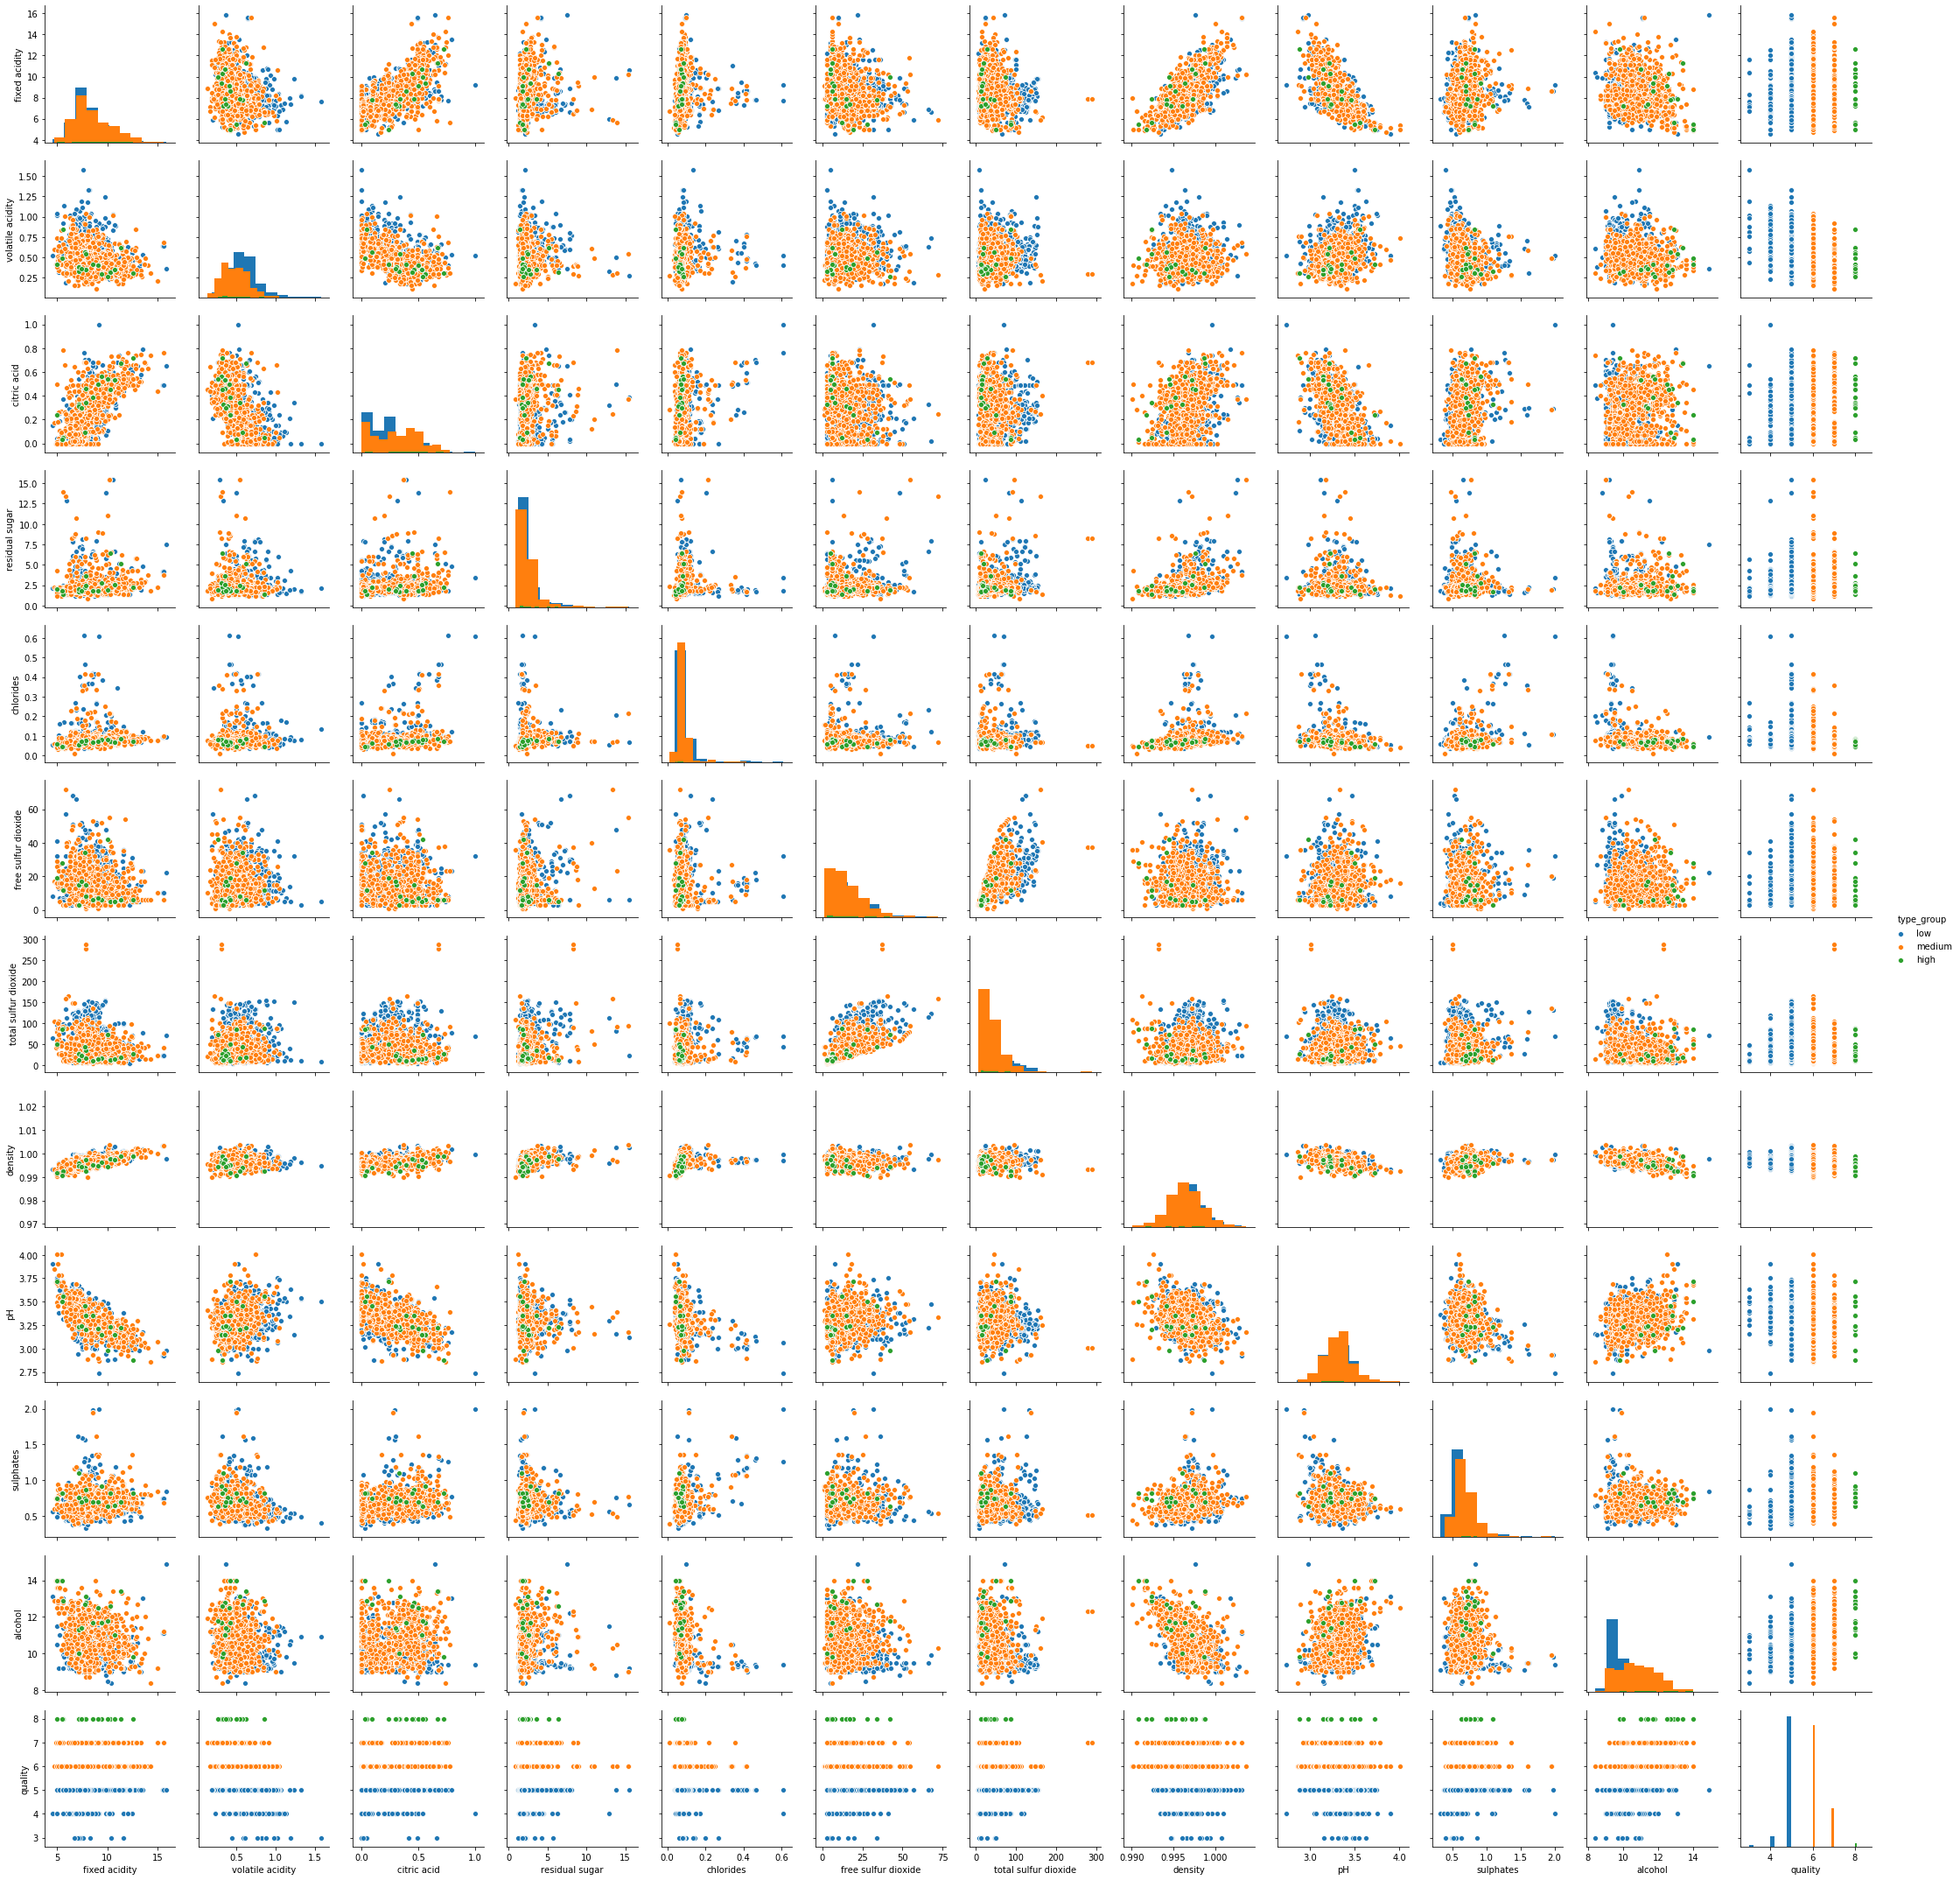

In [13]:
sns.pairplot(red, hue="type_group", diag_kind="hist")

### White Wine Pairplot

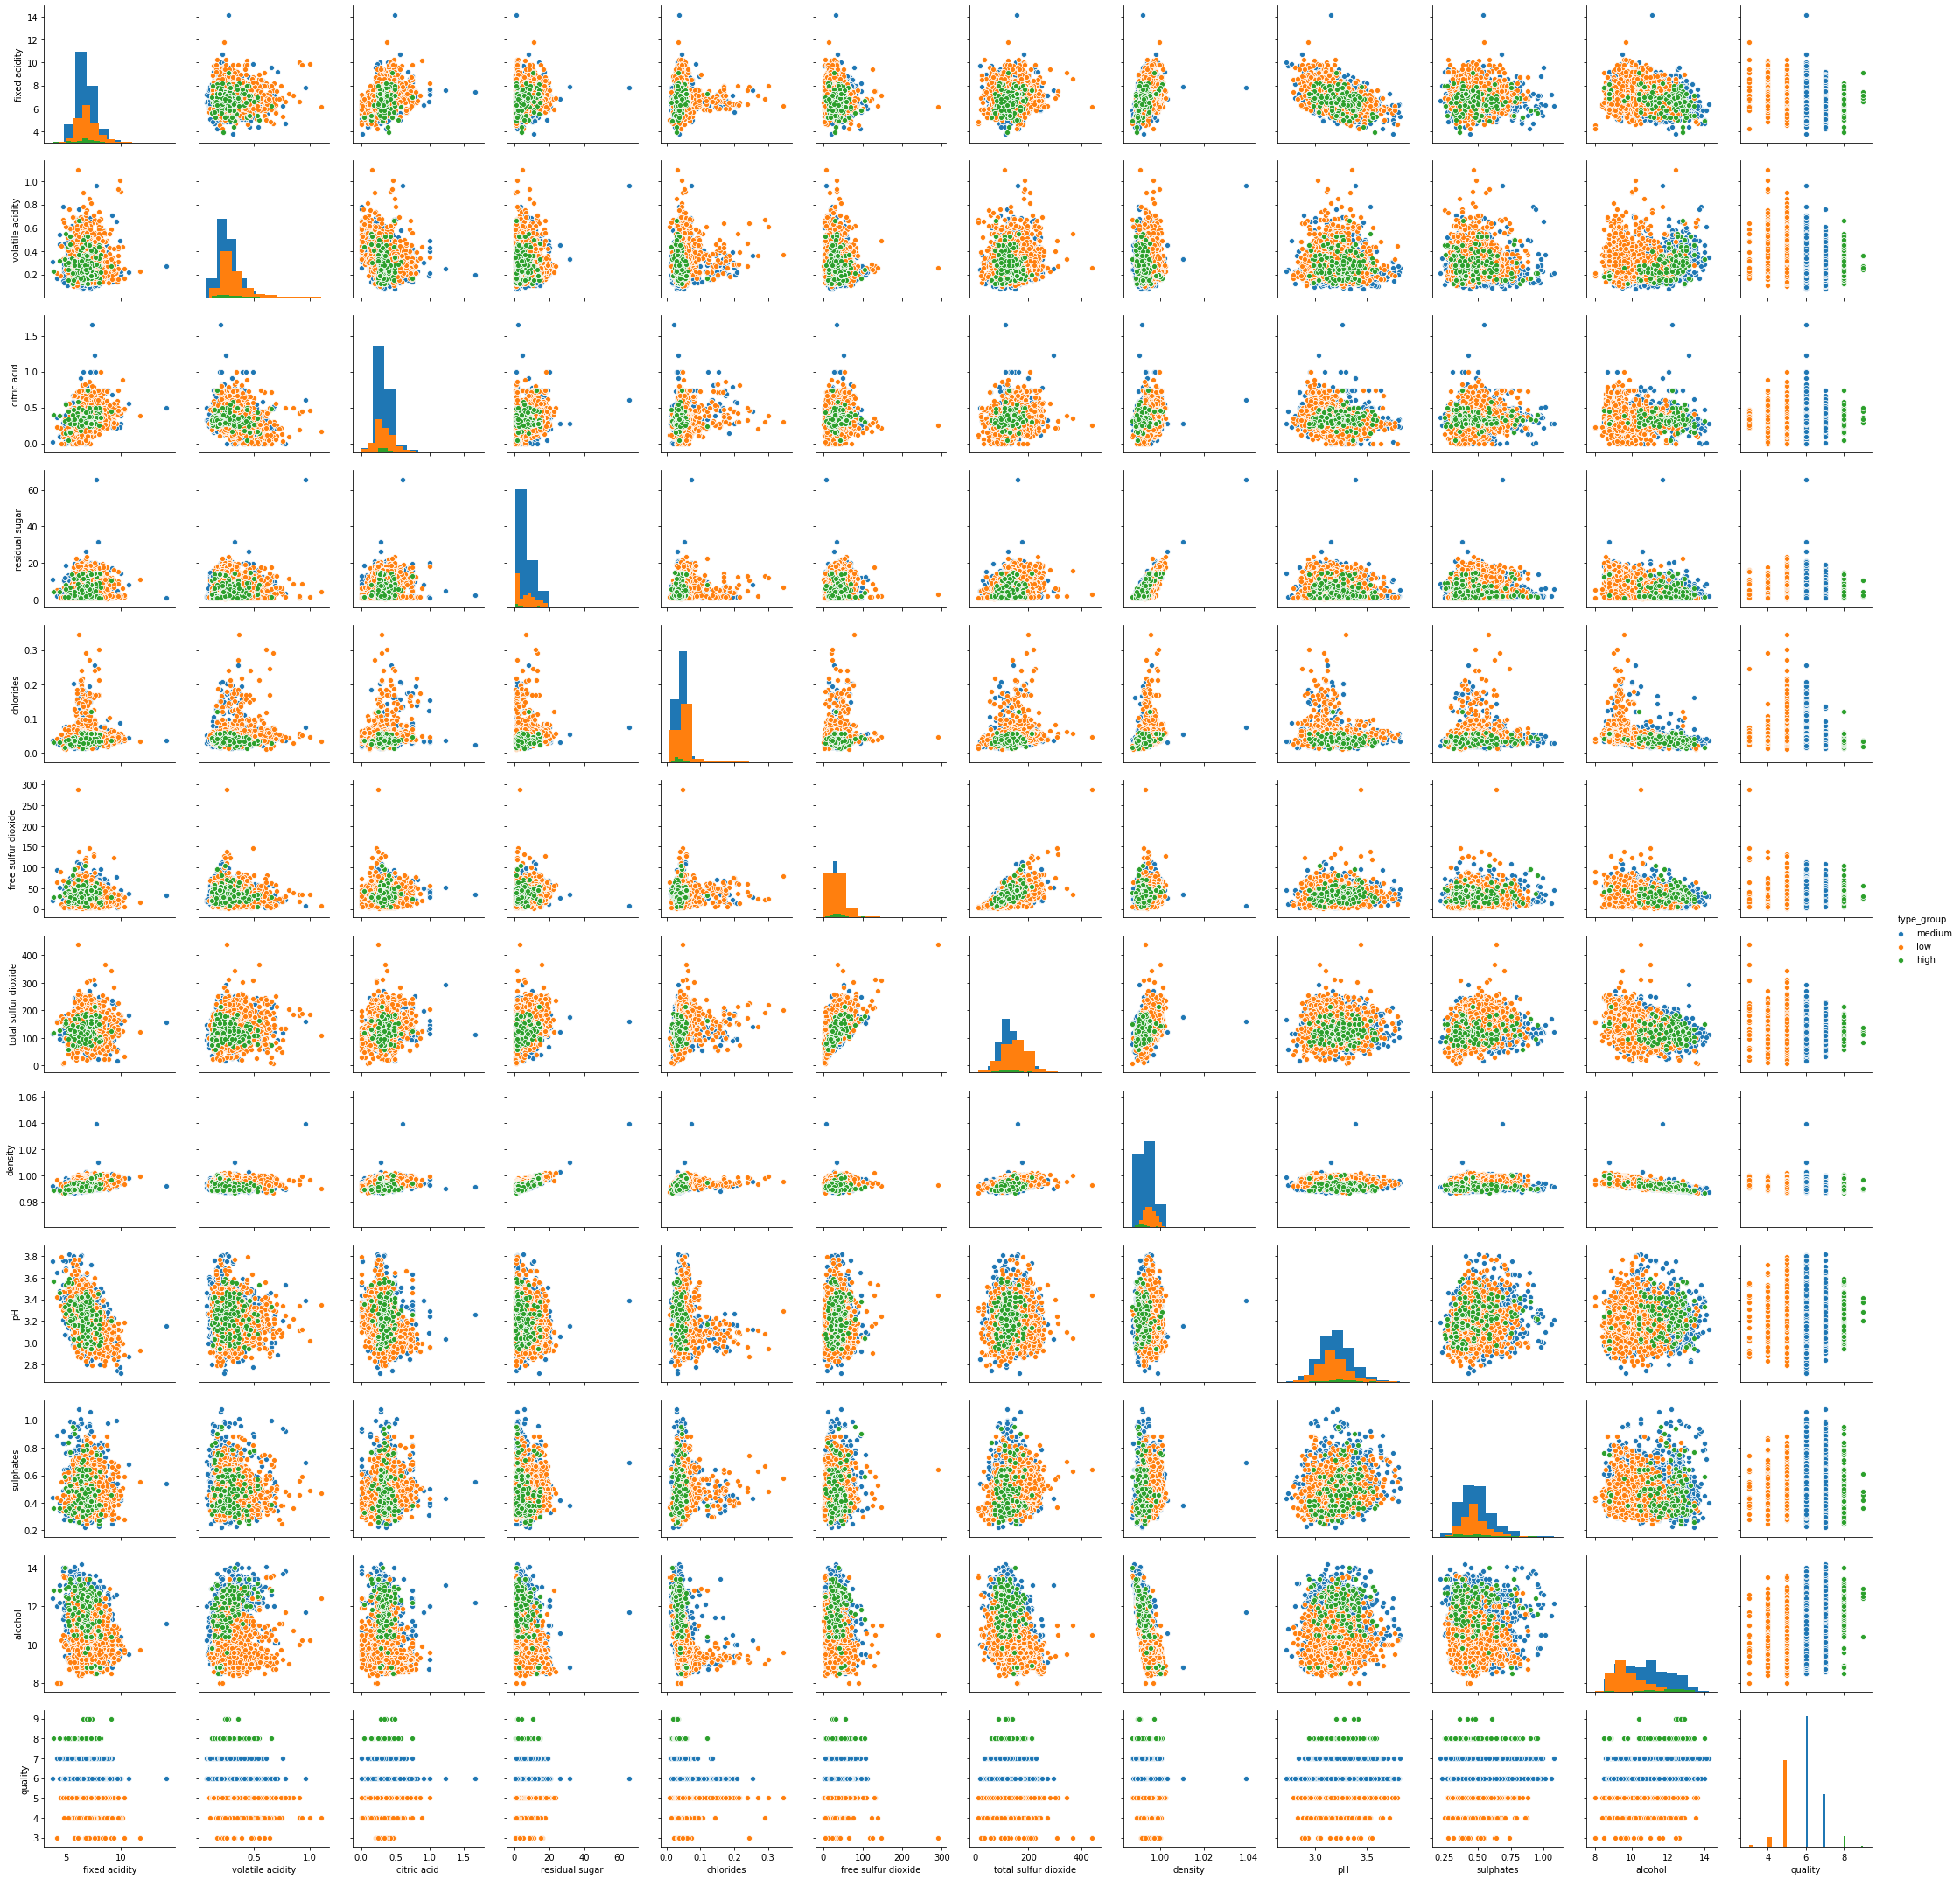

In [14]:
sns.pairplot(white , hue="type_group", diag_kind="hist")

### Alcohol

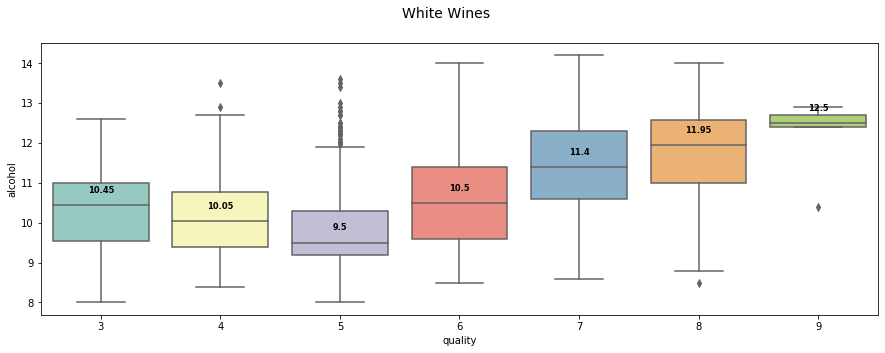

In [15]:
f= plt.figure(figsize=(15,5))
f.suptitle('White Wines', fontsize= 14)
box_plot = sns.boxplot(x= 'quality' , y= 'alcohol' , data=white, palette ='Set3')


medians = white.groupby(['quality'])['alcohol'].median().values
vertical_offset = white['alcohol'].median() * 0.03 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='small',color='black',weight='semibold')


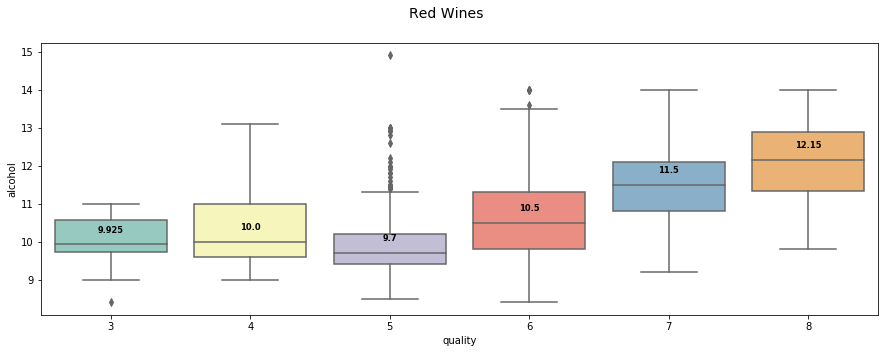

In [16]:
f= plt.figure(figsize=(15,5))
f.suptitle('Red Wines', fontsize= 14)
box_plot = sns.boxplot(x= 'quality' , y= 'alcohol' , data=red, palette ='Set3')


medians = red.groupby(['quality'])['alcohol'].median().values
vertical_offset = white['alcohol'].median() * 0.03 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='small',color='black',weight='semibold')


From the visuals we can observe the maximum quality of red wines is 8, in comparison to the the white wines which maximum is 9. The quality of the wines are rated by professionals. The average alcohol for each quality of wine is fairly similar to the type of wine as well.

### Acidity 

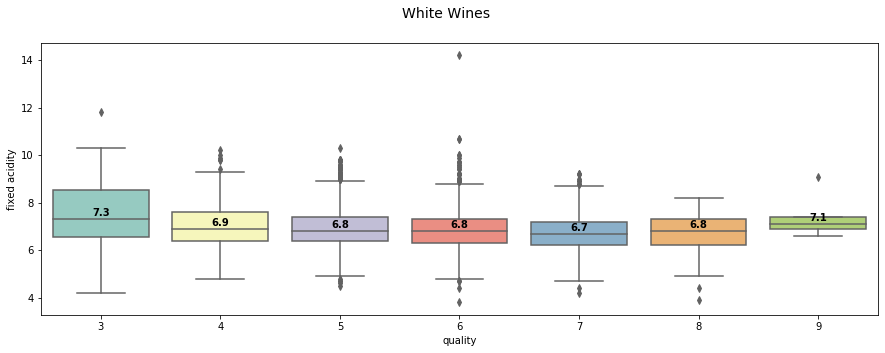

In [17]:
f= plt.figure(figsize=(15,5))
f.suptitle('White Wines', fontsize= 14)
box_plot = sns.boxplot(x= 'quality' , y= 'fixed acidity' , data=white, palette ='Set3')


medians = white.groupby(['quality'])['fixed acidity'].median().values
vertical_offset = white['fixed acidity'].median() * 0.02 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='medium',color='black',weight='semibold')

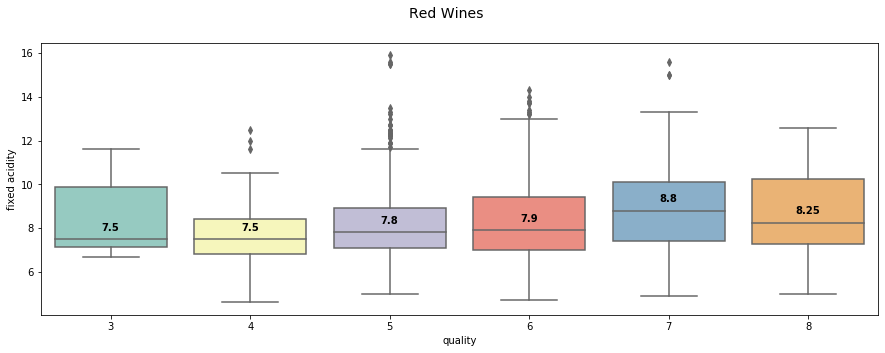

In [18]:
f= plt.figure(figsize=(15,5))
f.suptitle('Red Wines', fontsize= 14)
box_plot= sns.boxplot(x= 'quality' , y= 'fixed acidity' , data=red, palette ='Set3')


medians = red.groupby(['quality'])['fixed acidity'].median().values
vertical_offset = red['fixed acidity'].median() * 0.05 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='medium',color='black',weight='semibold')

In [19]:
red.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality', 'type_group'],
      dtype='object')

### Sulphates
 Many experts believe that higher sulfurous content causes a duller taste in wine, and that high potency of sulfite ions presents a health risk and speeds up the wine's fermentation process.

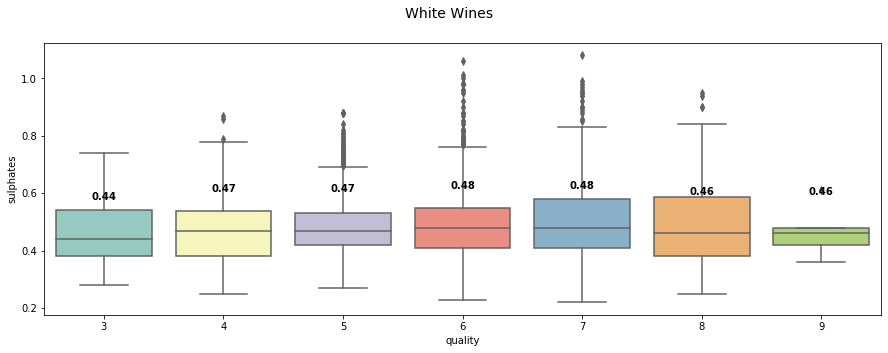

In [20]:
f= plt.figure(figsize=(15,5))
f.suptitle('White Wines', fontsize= 14)
box_plot = sns.boxplot(x= 'quality' , y= 'sulphates' , data=white, palette ='Set3')


medians = white.groupby(['quality'])['sulphates'].median().values
vertical_offset = white['fixed acidity'].median() * 0.02 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='medium',color='black',weight='semibold')

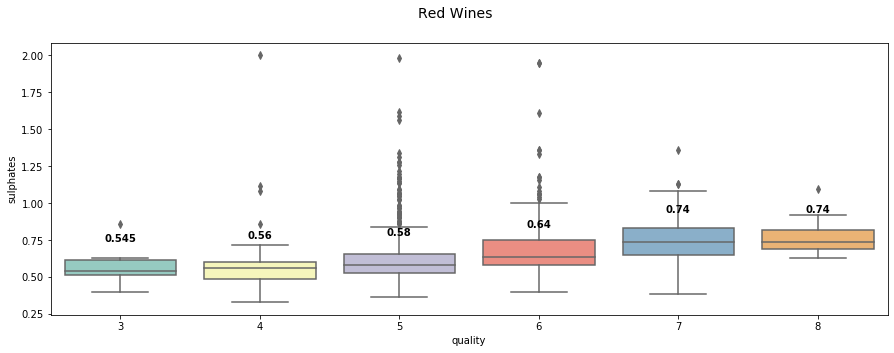

In [21]:
f= plt.figure(figsize=(15,5))
f.suptitle('Red Wines', fontsize= 14)
box_plot = sns.boxplot(x= 'quality' , y= 'sulphates' , data=red, palette ='Set3')


medians = red.groupby(['quality'])['sulphates'].median().values
vertical_offset = white['fixed acidity'].median() * 0.029 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='medium',color='black',weight='semibold')

In [22]:
wine.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality', 'type_group'],
      dtype='object')

### Type Group Count

Total Wines

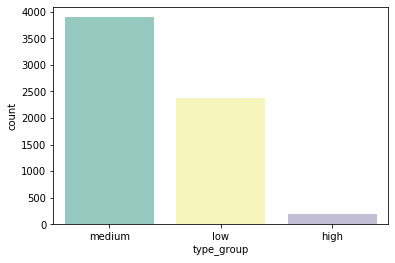

In [23]:

sns.countplot(x= 'type_group', data=wine, palette ='Set3')

Red Wines

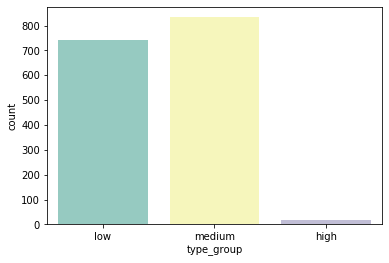

In [24]:
sns.countplot(x= 'type_group', data=red, palette ='Set3')

White Wines

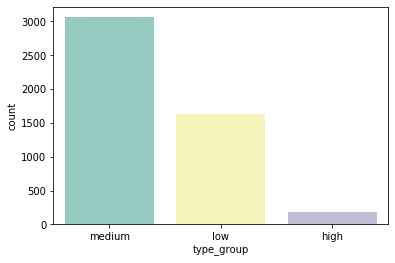

In [25]:
sns.countplot(x= 'type_group', data=white, palette ='Set3')

## Statistical tests 

I will be running ANOVA tests based on the type groups I assigned earlier. I will run the statistic tests from the dataframe of both red and white wines. 

In [26]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats import weightstats as stests
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

#### Alcohol

In [27]:
anova_state = ols('alcohol~type_group', data=wine).fit()
anova_table = sm.stats.anova_lm(anova_state, type=2)
mc = MultiComparison(wine['alcohol'],wine['type_group'])
mc_results = mc.tukeyhsd()
print(anova_table)
'\n'
print(mc_results)

                df       sum_sq     mean_sq           F         PR(>F)
type_group     2.0  1579.020363  789.510182  669.322981  6.745300e-265
Residual    6460.0  7619.992024    1.179565         NaN            NaN
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
  high    low  -1.8118 0.001 -2.0006  -1.623   True
  high medium  -0.8764 0.001 -1.0623 -0.6904   True
   low medium   0.9354 0.001  0.8691  1.0017   True
---------------------------------------------------


#### Sulphates

In [28]:
anova_state = ols('sulphates~type_group', data=wine).fit()
anova_table = sm.stats.anova_lm(anova_state, type=2)
mc = MultiComparison(wine['sulphates'],wine['type_group'])
mc_results = mc.tukeyhsd()
print(anova_table)
'\n'
print(mc_results)

                df      sum_sq   mean_sq         F   PR(>F)
type_group     2.0    0.298797  0.149398  6.749175  0.00118
Residual    6460.0  142.997361  0.022136       NaN      NaN
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  high    low   0.0122 0.5125 -0.0137  0.038  False
  high medium   0.0245 0.0626  -0.001   0.05  False
   low medium   0.0123 0.0042  0.0032 0.0214   True
---------------------------------------------------


#### pH

In [29]:
anova_state = ols('pH~type_group', data=wine).fit()
anova_table = sm.stats.anova_lm(anova_state, type=2)
mc = MultiComparison(wine['pH'],wine['type_group'])
mc_results = mc.tukeyhsd()
print(anova_table)
'\n'
print(mc_results)

                df      sum_sq   mean_sq         F    PR(>F)
type_group     2.0    0.056194  0.028097  1.088713  0.336711
Residual    6460.0  166.717625  0.025808       NaN       NaN
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  high    low  -0.0102 0.6524 -0.0382 0.0177  False
  high medium  -0.0045    0.9  -0.032  0.023  False
   low medium   0.0057  0.364 -0.0041 0.0155  False
---------------------------------------------------
